## Ensemble - Random Forest(Bagging Ensemble)


In [ ]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
df.shape

(891, 8)

In [6]:
m = df.isna().sum()
m[m>0]

Age         177
Embarked      2
dtype: int64

In [7]:
df.duplicated().sum()

111

In [12]:
x= df.drop(columns =['Survived'])
y=df[['Survived']]

In [13]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

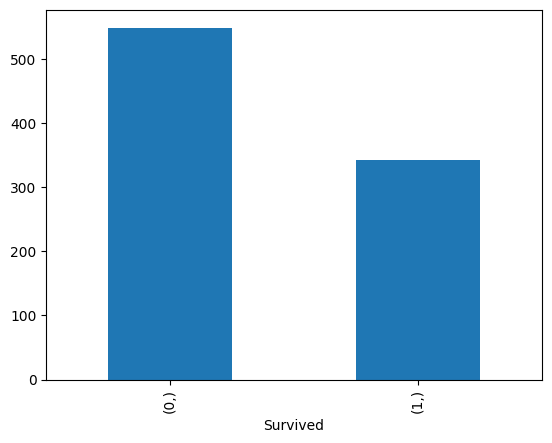

In [18]:
y.value_counts().plot(kind= 'bar')

## Step 4: Perform preprocessing on X


In [23]:
cat = list(x.columns[x.dtypes == 'object'])
con = list (x.columns[x.dtypes!= 'object'])

In [24]:
cat

['Sex', 'Embarked']

In [22]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [26]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy= 'median')), 
                             ('scaler', StandardScaler())])

In [32]:
cat_pipe = Pipeline(steps= [('impute', SimpleImputer(strategy= 'most_frequent')), 
                            ('ohe', OneHotEncoder(handle_unknown = 'ignore', 
                                                  sparse_output = False))])

In [33]:
pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)]).set_output(transform = 'pandas')

In [34]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


## Step 5: Apply train test split

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size = 0.2, random_state = 42)

In [37]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [38]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [39]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [40]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


## Step 6: Build the model

In [46]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 1, 
                                criterion = 'gini', 
                                max_depth = 1, 
                                min_samples_split = 5, 
                                min_samples_leaf = 5)
model1.fit(xtrain, ytrain)

d:\ML_work\repository\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [47]:
model1.score(xtrain, ytrain)

0.7879213483146067

In [48]:
model1.score(xtest, ytest)

0.7821229050279329

## tune the model with hyperparameter tuning

In [55]:
params1 = {'n_estimators': [10, 50, 100, 200], 
          'max_depth': [1, 2, 3, 4, 5, 6, 7], 
          'min_samples_split': [5, 7, 8, 9, 10]}

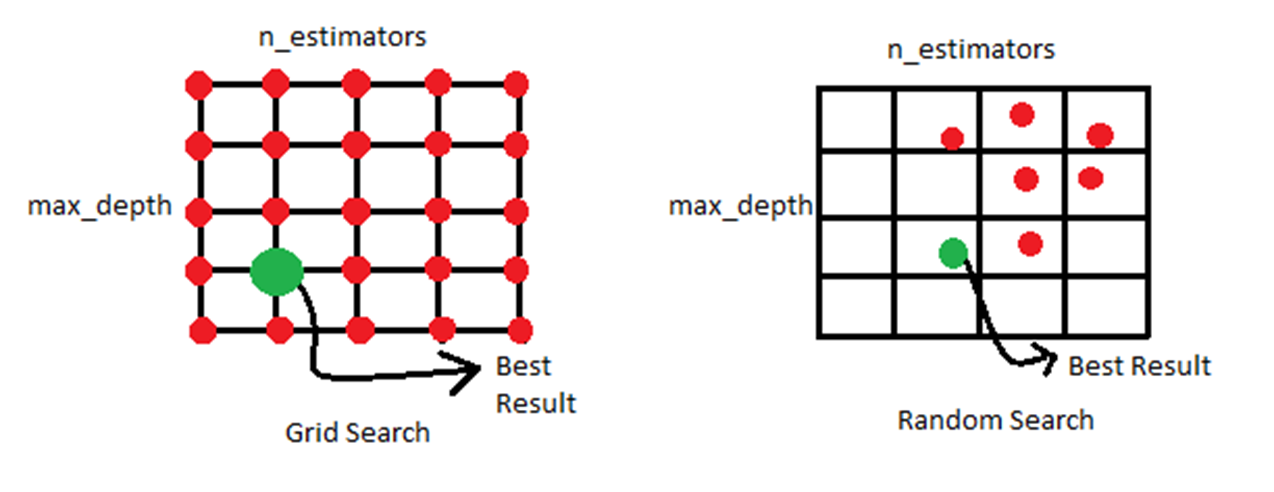

In [56]:
# for faster response use Randonized SearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions = params1, cv= 5, scoring = 'f1_micro')
rscv1.fit(xtrain, ytrain)



d:\ML_work\repository\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ML_work\repository\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_micro')

In [57]:
rscv1.best_params_

{'n_estimators': 10, 'min_samples_split': 5, 'max_depth': 5}

In [58]:
rscv1.best_score_

0.8286023835319609

In [59]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=10)

## Evaluate random Forest

In [60]:
best_rfc.score(xtrain, ytrain)

0.851123595505618

In [62]:
best_rfc.score(xtest, ytest)

0.8100558659217877

In [ ]:
# Confsion Matirix
from sklearn.matrics import Conf